# Pawpularity Contest

## Overview

A picture is worth a thousand words. But did you know a picture can save a thousand lives? Millions of stray animals suffer on the streets or are euthanized in shelters every day around the world. You might expect pets with attractive photos to generate more interest and be adopted faster. But what makes a good picture? With the help of data science, you may be able to accurately determine a pet photo’s appeal and even suggest improvements to give these rescue animals a higher chance of loving homes.

## Business Understanding

## Technical Understanding

## Data Understanding

For this project, we have historical data from the PetFinder.my website composed of almost 10,000 images and hand-labeled metadata per image. We'll begin by investigating the metadata data set, then move on to the corresponding images data set. 

### Metadata Regression Dataset

In this section, we will put the Metadata under the microscope, seraching for trends between its features and our target. 

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set optional module display options
%matplotlib inline
pd.set_option('display.max_colwidth', None)

In [2]:
# load data into DataFrame object
df = pd.read_csv('data/train.csv')

# preview DataFrame
df.head(5)

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0,63
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0,42
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0,28
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0,15
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0,72


In [3]:
# get info per feature in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             9912 non-null   object
 1   Subject Focus  9912 non-null   int64 
 2   Eyes           9912 non-null   int64 
 3   Face           9912 non-null   int64 
 4   Near           9912 non-null   int64 
 5   Action         9912 non-null   int64 
 6   Accessory      9912 non-null   int64 
 7   Group          9912 non-null   int64 
 8   Collage        9912 non-null   int64 
 9   Human          9912 non-null   int64 
 10  Occlusion      9912 non-null   int64 
 11  Info           9912 non-null   int64 
 12  Blur           9912 non-null   int64 
 13  Pawpularity    9912 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


Our dataset consists of 13 features and 1 target. For the sake of clarity, we will enumerate each feature and what it represents:
<ol>
    <u>Feature Columns</u>
    <li><b>Id</b> - the .jpg file name of the associated image located in the data/train folder.</li>
    <li><b>Subject Focus</b> - Pet stands out against uncluttered background, not too close / far.</li>
    <li><b>Eyes</b> - Both eyes are facing front or near-front, with at least 1 eye / pupil decently clear.</li>
    <li><b>Face</b> - Decently clear face, facing front or near-front.</li>
    <li><b>Near</b> - Single pet taking up significant portion of photo (roughly over 50% of photo width or height).</li>
    <li><b>Action</b> - Pet in the middle of an action (e.g., jumping).</li>
    <li><b>Accessory</b> - Accompanying physical or digital accessory / prop (i.e. toy, digital sticker), excluding collar and leash.</li>
    <li><b>Group</b> - More than 1 pet in the photo.</li>
    <li><b>Collage</b> - Digitally-retouched photo (i.e. with digital photo frame, combination of multiple photos).</li>
    <li><b>Human</b> - Human in the photo.</li>
    <li><b>Occlusion</b></b> - Specific undesirable objects blocking part of the pet (i.e. human, cage or fence). Note that not all blocking objects are considered undesirable.</li>
    <li><b>Info</b> - Custom-added text or labels (i.e. pet name, description).</li>
    <li><b>Blur</b> - Noticeably out of focus or noisy, especially for the pet’s eyes and face. For Blur entries, “Eyes” column is always set to 0.</li>
</ol>

Note also, that all of our features are one-hot style. 

<ol><u>Target Column</u>
    <li><b>Pawpularity</b> - The Pawpularity Score is derived from each pet profile's page view statistics at the listing pages, using an algorithm that normalizes the traffic data across different pages, platforms (web & mobile) and various metrics. Duplicate clicks, crawler bot accesses and sponsored profiles are excluded from the analysis. </li>
</ol>

Note that our target is an integer between 0 and 100. 

Additionally, it appears that we are not missing any values, which is always a huge win! Let's take a look at the properties of the columns.

In [4]:
# break df into data and target
data = df.drop(['Pawpularity'], axis=1)
target = df['Pawpularity']

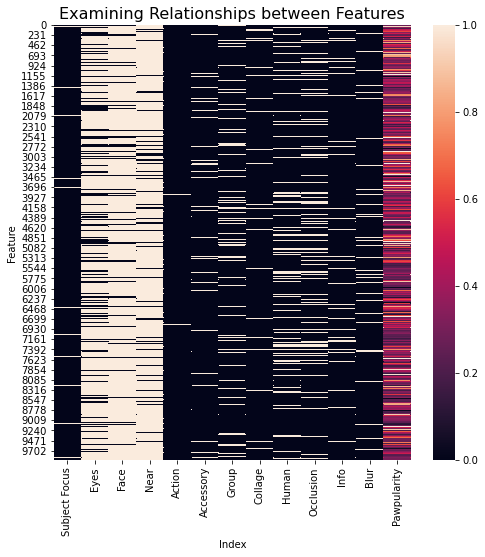

In [5]:
# plot heatmap of data per index for relationship insights
plt.figure(figsize=(8,8))
sns.heatmap(pd.concat([data.drop('Id', axis=1), target/100], axis=1));
plt.title('Examining Relationships between Features', fontsize=16);
plt.xlabel('Index');
plt.ylabel('Feature');
plt.show();

There are no visually discernible patterns between feature expressions/combinations and target values. 

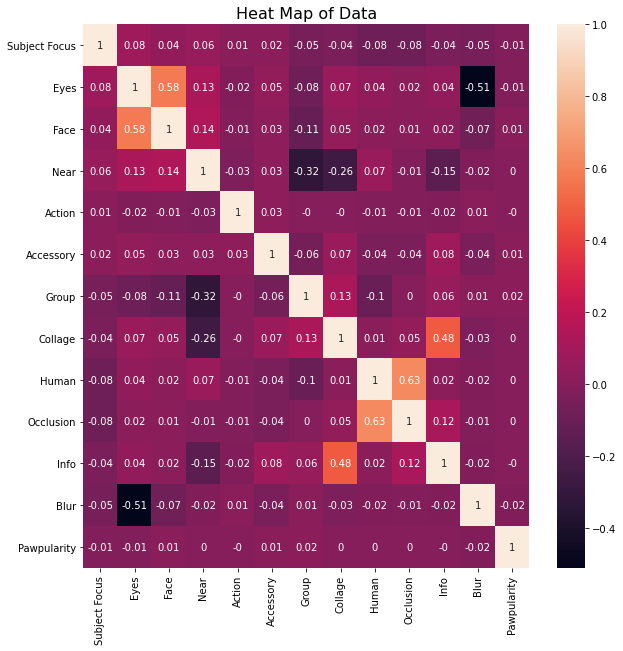

In [6]:
# plot heatmap of data
plt.figure(figsize=(10,10))
sns.heatmap(round(df.corr(), 2), annot=True);
plt.title('Heat Map of Data', fontsize=16);

It also looks as though multicollinearity will not be a huge issue with our data. But if we do run into model complexity / overfitting due to high variance issues further down the line, we should remember the few feature correlations that stand apart from the rest for tuning purposes:

- Face and Eyes
- Human and Occlusion
- Collage and Info
- Blur and Eyes

Since the Eyes-feature is highly correlated with two other features, we might consider dropping it as opposed to dropping the Face- and Blur-features. But it would be beneficial to test all the different cases at our disposal for insurance purposes.

Also, the feature correlations with our target variable are devestatingly low, thus we might expect this process to be a bit more tedious / better estimated by a complex model. 

In [7]:
# check sparsity of feature columns
data.drop('Id', axis=1).mean()

Subject Focus    0.027643
Eyes             0.772599
Face             0.903955
Near             0.861582
Action           0.009988
Accessory        0.067797
Group            0.129338
Collage          0.049637
Human            0.166263
Occlusion        0.172014
Info             0.061239
Blur             0.070420
dtype: float64

Looking at the means of each feature, we can tell that there some of the features are severely sparsely populated while others are very densely populated. None are relatively evenly populated. 

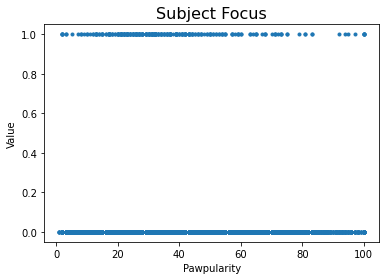

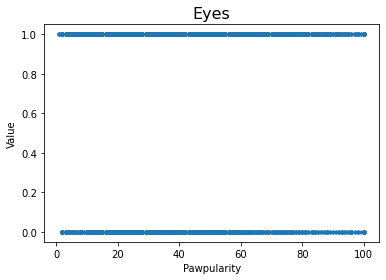

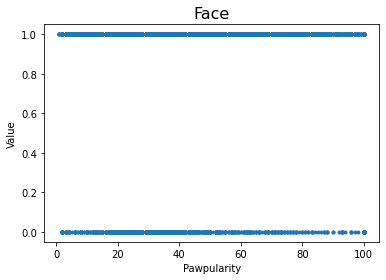

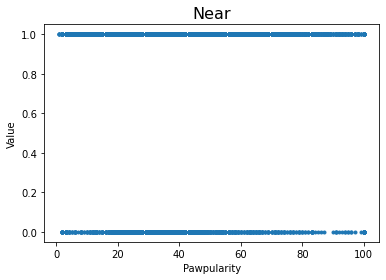

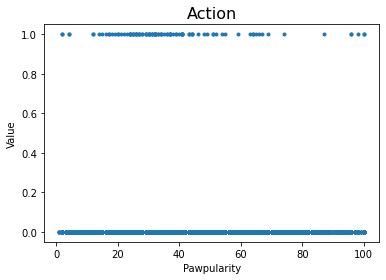

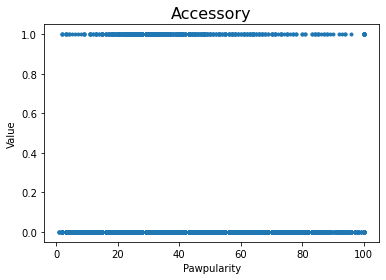

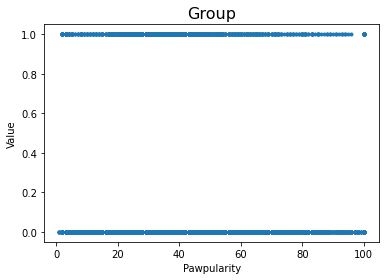

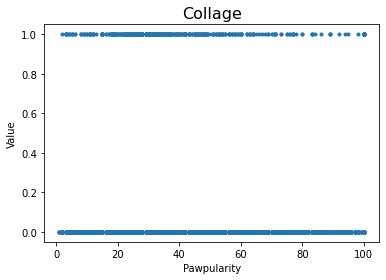

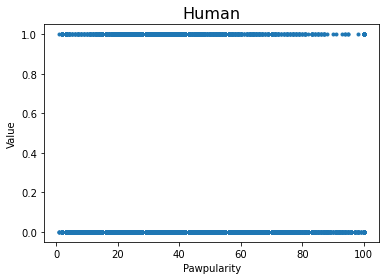

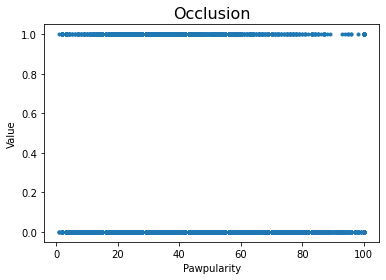

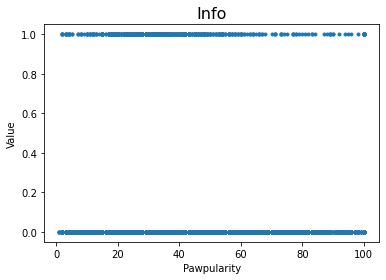

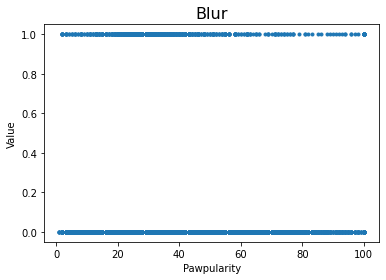

In [8]:
# plot feature vs. target distributions
for col in data.drop('Id', axis=1).columns:
    plt.figure()
    plt.title(str(col), fontsize=16)
    plt.xlabel('Pawpularity')
    plt.ylabel('Value')
    plt.plot(target, data[col], '.')

As we might have expected from the heat map, the plots do not indicate that there exists a strong relationship between the value of any given feature and the target pawpularity score. 

Let's take a look at the target variable, pawpularity score. 

In [9]:
# check descriptive statistics of target
target.describe()

count    9912.000000
mean       38.039044
std        20.591990
min         1.000000
25%        25.000000
50%        33.000000
75%        46.000000
max       100.000000
Name: Pawpularity, dtype: float64

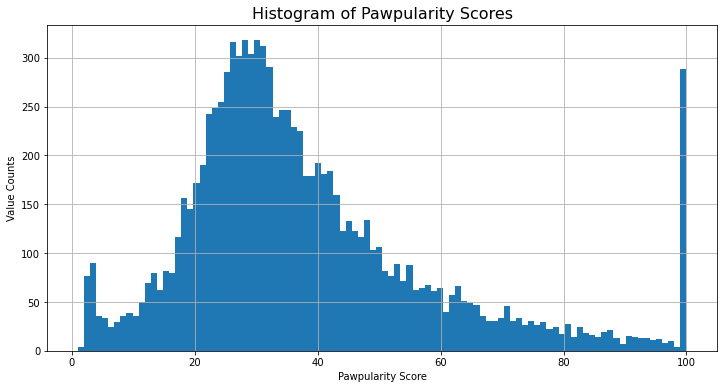

In [27]:
# plot histogram of target data
plt.figure(figsize=(12,6));
target.hist(bins=100);
plt.title('Histogram of Pawpularity Scores', fontsize=16);
plt.xlabel('Pawpularity Score');
plt.ylabel('Value Counts');

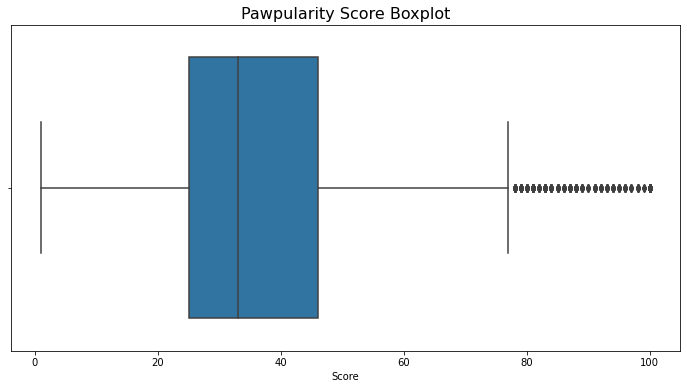

In [28]:
# plot boxplot of target data
plt.figure(figsize=(12,6));
sns.boxplot(target);
plt.title('Pawpularity Score Boxplot', fontsize=16);
plt.xlabel('Score');

It appears as though we are dealing with a relatively normally distributed target variable, which is always great news. Since the distribution is skewed right, we might consider applying a square root or log transform in order to achieve a higher degree of normality. As we might have expected from the heavy right-tail of histogram, our target data contains several outlier values in the range of higher values. It might benefit us to take a look at the outlier distribution as well. If time permits, there could be value in exploring a calssifier model that can predict where the sample is an outlier. In the meantime, let's take a look at our outlier-valued samples. 

The stop value of the upper quartile is: 77.5


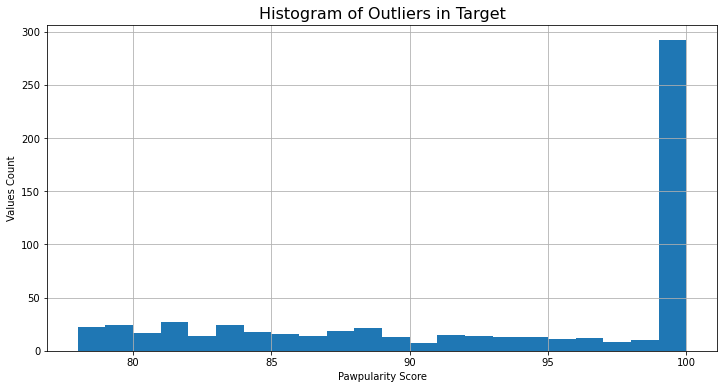

Value Counts Per Pawpularity Score:
- - - - - - - - - - - - - - - - - -
78      22
79      24
80      17
81      27
82      14
83      24
84      18
85      16
86      14
87      19
88      21
89      13
90       7
91      15
92      14
93      13
94      13
95      11
96      12
97       8
98      10
99       4
100    288
Name: Pawpularity, dtype: int64

Total Number of Outliers: 624


In [29]:
# find interquartile range
q1 = target.quantile(.25)
q3 = target.quantile(.75)
iqr = q3 - q1

# compute high stop-value; we don't need to worry about the low stop-value 
# because, according to our boxplot, there are no low-valued outliers
stop_high = q3 + 1.5*iqr
print('The stop value of the upper quartile is: ' + str(stop_high))

# get distribution of outliers in our dataset
plt.figure(figsize=(12,6));
target[target > stop_high].hist(bins=22);
plt.title('Histogram of Outliers in Target', fontsize=16);
plt.xlabel('Pawpularity Score');
plt.ylabel('Values Count');
plt.show();

# print out pawpularity score value counts for each outlier score
print('Value Counts Per Pawpularity Score:')
print('- - - - - - - - - - - - - - - - - -')
print(target[target > stop_high].value_counts().sort_index())
print()

# print out total number of outliers
num_outliers = target[target > stop_high].value_counts().sum()
print('Total Number of Outliers: ' + str(num_outliers))

Our outliers are uniformly distributed, except for at 100, where we have 288 values. Again, we might take a closer look at how we incorporate our ouliers in training later on in the modeling process if we don't achieve the level of performance that we are aiming for. But because there are so many 100-valued samples (as well as others, appx. 6% of our dataset), we cannot simply disregard them; again, it might be worth it to revisit the concept of creating a classification model designed to detect outliers, or 100-valued targets. 

### Metadata Classification Datasets

We might be interested in trying to approach this from a classification angle. There's the chance that a classification model would do better than a regression model - the only way to know is to find out. We will explore this approach by creating datasets that delineate classes in various increments of Pawpularity. This will be more clear in the code to follow. 

In [82]:
def make_classes(df, n_classes, target_col='Pawpularity', agg_func=None):
    
    df = df.copy()
    
    bins = []
    labels = []
    
    bins.append(df[target_col].min())
    
    for i in range(1, n_classes):
        
        q = round(i / n_classes, 2)
        bins.append(df[target_col].quantile(q))
        
    bins.append(df[target_col].max())
    
    for i in range(len(bins) - 1):
        
        df_slice = (df[(df[target_col] >= bins[i]) & 
                       (df[target_col] < bins[i+1])])
        
        slice_median = df_slice[target_col].median()
        labels.append(slice_median)
        
    df[target_col] = pd.cut(df[target_col],
                            bins=bins,
                            labels=labels)
    
    print('Value counts of new classes: ')
    print(df[target_col].value_counts().sort_index())
    
    return df

In [125]:
df_clf = df.copy()

In [126]:
df_2class = make_classes(df_clf, 2)

Value counts of new classes: 
25.0    5034
45.0    4874
Name: Pawpularity, dtype: int64


In [127]:
df_3class = make_classes(df_clf, 3)

Value counts of new classes: 
22.0    3570
33.0    3143
53.0    3195
Name: Pawpularity, dtype: int64


In [128]:
df_4class = make_classes(df_clf, 4)

Value counts of new classes: 
19.0    2634
29.0    2400
38.0    2401
58.0    2473
Name: Pawpularity, dtype: int64


In [129]:
df_5class = make_classes(df_clf, 5)

Value counts of new classes: 
17.0    2094
26.0    2098
33.0    1790
42.0    1995
63.0    1931
Name: Pawpularity, dtype: int64


For now, we will consider these new DataFrames sufficient. We decided to constuct our make_classes function in such a way to produce evenly balanced classes, but there are several other considerations to be had with respect to the classes to be produced: what if we used a different aggregation function to specify our bins? What if we evenly spaced our class labels (i.e. 25, 50, 75 for a 3-class df)? If necessary and time permits, we can revisit our strategy here to see if there is a better fit. 

### Images Dataset

We will now take a close look at the accompanying images dataset. 

In [132]:
# import necessary modules
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import os

In [14]:
# load images into workspace drom directory
train_generator = ImageDataGenerator().flow_from_directory(directory='data/',
                                                           shuffle=False,        # load images in alphanumerical order
                                                           target_size=(64,64), 
                                                           classes=['train'],
                                                           batch_size=9912)

# save images as RGB arrays
data_images = train_generator[0][0]

Found 9912 images belonging to 1 classes.


In [15]:
# check dataset shape
data_images.shape

(9912, 64, 64, 3)

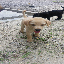

In [16]:
# preview first image
array_to_img(data_images[0])

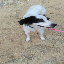

In [17]:
# preview last image
array_to_img(data_images[9911])

Great, so it looks as though everything is working properly. It should be noted that the order of the images is the same as the order of the Id column of the meta-data dataset. This means that we do not have to reorganize our target column to match the images dataset. If we use keras or another neural net library, we likely do not need to restructure our images. But since we could possibly benefit from the usage of a structured, pixel-by-pixel dataset, we should explore that as well. 

There could potentially be some value in organizing our images dataset in such a way as to make it useful to a simpler, non-ANN model. Furthermore, we could also test to see if its possible that we could use the image data as features and the image metadata as targets, attempting to create a classifier capable of detecting image metadata accurately. Let's go ahead and make our unstructured image dataset. 

In [118]:
img_data_reshaped = data_images.reshape(data_images.shape[0], -1)

img_r_cols = [str(i+1) + '_r' for i in range(img_data_reshaped.shape[1])]
img_g_cols = [str(i+1) + '_g' for i in range(img_data_reshaped.shape[1])]
img_b_cols = [str(i+1) + '_b' for i in range(img_data_reshaped.shape[1])]

img_col_names = []

for i in range(int(img_data_reshaped.shape[1] / 3)):
    
    img_col_names.append(img_r_cols[i])
    img_col_names.append(img_g_cols[i])
    img_col_names.append(img_b_cols[i])

In [122]:
img_df = pd.DataFrame(data=img_data_reshaped / 255, columns=img_col_names)

In [124]:
img_df.head()

,1_r,1_g,1_b,2_r,2_g,2_b,3_r,3_g,3_b,4_r,...,4093_b,4094_r,4094_g,4094_b,4095_r,4095_g,4095_b,4096_r,4096_g,4096_b
0,0.701961,0.686275,0.741176,0.643137,0.627451,0.682353,0.729412,0.713726,0.768627,0.725490,...,0.682353,0.639216,0.635294,0.619608,0.780392,0.776471,0.760784,0.752941,0.749020,0.733333
1,0.556863,0.545098,0.572549,0.505882,0.494118,0.521569,0.466667,0.454902,0.482353,0.454902,...,0.368627,0.560784,0.482353,0.384314,0.584314,0.490196,0.388235,0.607843,0.505882,0.415686
2,0.678431,0.662745,0.517647,0.690196,0.674510,0.529412,0.682353,0.666667,0.521569,0.701961,...,0.419608,0.105882,0.411765,0.427451,0.321569,0.627451,0.643137,0.109804,0.400000,0.411765
3,0.847059,0.878431,0.890196,0.850980,0.882353,0.894118,0.850980,0.882353,0.894118,0.866667,...,0.537255,0.607843,0.611765,0.592157,0.623529,0.627451,0.596078,0.560784,0.549020,0.521569
4,0.219608,0.239216,0.250980,0.223529,0.223529,0.215686,0.674510,0.658824,0.654902,0.423529,...,0.878431,0.996078,1.000000,1.000000,0.890196,0.894118,0.909804,0.913725,0.925490,0.945098


### Datasets Summary

Great! We have now cleaned and prepared several datasets, which is arguably the most important task in all of the machine learning process. Let's take a quick inventory, so that we know what data we have available to us going forward.

<b>Datasets</b>
<ul>
    <u>Metadata Datasets</u>
    <li><b>data</b> - regression dataset consisting of our raw data</li>
    <li><b>df_2class</b> - classification dataset consisting of 2 class output. Target included in DataFrame.</li>
    <li><b>df_3class</b> - classification dataset consisting of 3 class output. Target included in DataFrame.</li>
    <li><b>df_4class</b> - classification dataset consisting of 4 class output. Target included in DataFrame.</li>
    <li><b>df_5class</b> - classification dataset consisting of 5 class output. Target included in DataFrame.</li>
    <u>Image Datasets</u>
    <li><b>data_images</b> - dataset consisting of the images, with each image in structured array format. can be explored using to_image function.</li>
    <li><b>img_df</b> - structured image DataFrame with each column representing the R, G, or B intensity of a pixel, ranging between and including 0 and 1. </li>
</ul>

Note that it might be convenient to mix and match some of these datasets - we'll have to test it out to see what approach works best. 

Nice! We can now move on to the modeling process. 

---

## Modeling (Regression, Metadata only)

We will begin our modeling process by first establishing a baseline to go off. Then, we will iterate and optimize several different models on strictly the metadata. After we are confident that we have totally exhausted the metadata, we will move on to modeling using ANNs on the image data. 

Because this is a regression project, we have decided on using RMSE as our performance metric. Based on performance of other individuals and teams competing, we have set our goal at an RMSE of 18. 

In [134]:
# import preliminary items
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

from sklearn.compose import TransformedTargetRegressor

In [135]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Id', axis=1), 
                                                    target,
                                                    random_state=42)

In [136]:
def fit_score_plot(model, model_name, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    p_train = model.predict(X_train)
    rmse_train = mean_squared_error(y_train, p_train, squared=False)
    print('RMSE Train: ' + str(round(rmse_train, 2)))

    p_test = model.predict(X_test)
    rmse_test = mean_squared_error(y_test, p_test, squared=False)
    print('RMSE Test: ' + str(round(rmse_test, 2)))
    
    
    idx = list(range(len(y_test)))
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12,6))

    ax1.plot(idx, y_test, '.', alpha=.2);
    ax1.set_title('True Values');


    ax2.plot(idx, p_test, '.', alpha=.2, color='orange');
    ax2.set_title('Predicted Values');
    
    fig.suptitle(model_name + ' Results', fontsize=16)

In [137]:
def target_trans_sqrt(target):
    
    target_ = target.copy()
    target_ = np.sqrt(target_)
    return target_

def target_inverse_trans_sqrt(target):
    
    target_ = target.copy()
    target_ = target_ ** 2
    return target_

### Baseline

We'll begin by establishing our baseline model with a simple linear regressor. 

In [138]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1)

RMSE Train: 20.4
RMSE Test: 21.07


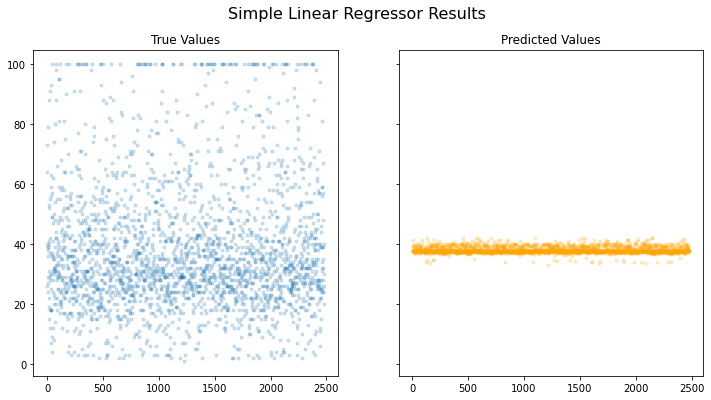

In [139]:
fit_score_plot(lin_reg, 'Simple Linear Regressor', X_train, X_test, y_train, y_test)

In [140]:
lin_reg.coef_

array([-0.91444417, -2.41744853,  2.98815902,  0.39816829,  0.1593253 ,
        1.71102315,  1.13990254,  1.1172419 , -0.28722917,  0.09515917,
       -0.55418547, -3.09014535])

In [141]:
lin_reg.intercept_

36.83022918873713

Great, we have established our baseline. We may now move into optimizing this baseline so that we may test it against other models. 

In [142]:
data

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur
0,0007de18844b0dbbb5e1f607da0606e0,0,1,1,1,0,0,1,0,0,0,0,0
1,0009c66b9439883ba2750fb825e1d7db,0,1,1,0,0,0,0,0,0,0,0,0
2,0013fd999caf9a3efe1352ca1b0d937e,0,1,1,1,0,0,0,0,1,1,0,0
3,0018df346ac9c1d8413cfcc888ca8246,0,1,1,1,0,0,0,0,0,0,0,0
4,001dc955e10590d3ca4673f034feeef2,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,ffbfa0383c34dc513c95560d6e1fdb57,0,0,0,1,0,0,0,0,0,0,0,1
9908,ffcc8532d76436fc79e50eb2e5238e45,0,1,1,1,0,0,0,0,0,0,0,0
9909,ffdf2e8673a1da6fb80342fa3b119a20,0,1,1,1,0,0,0,0,1,1,0,0
9910,fff19e2ce11718548fa1c5d039a5192a,0,1,1,1,0,0,0,0,1,0,0,0


### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

rf_baseline = RandomForestRegressor(random_state=42)

RMSE Train: 20.07
RMSE Test: 21.33


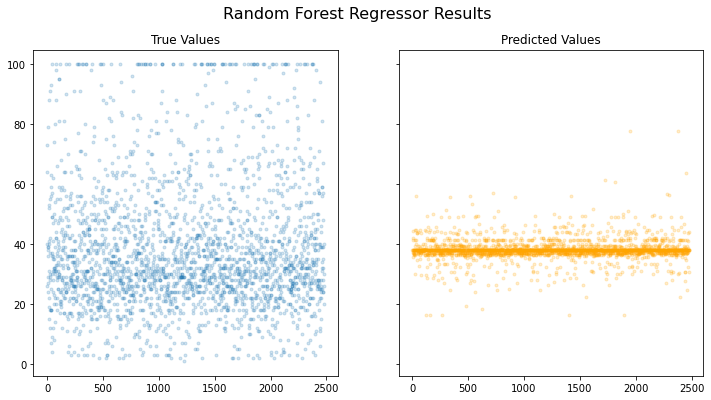

In [155]:
fit_score_plot(rf_baseline, 'Random Forest Regressor', X_train, X_test, y_train, y_test)

In [165]:
rf_pipe = Pipeline(steps=[('rf', RandomForestRegressor(random_state=42))])


rf_grid = {
    
    'rf__max_depth':[2,6,10,14],
    'rf__min_samples_leaf':[2,6,10],
    'rf__max_samples':[.1,.2,.3]
    
}


rf_gs = GridSearchCV(estimator=rf_pipe,
                     param_grid=rf_grid,
                     cv=5,
                     scoring='neg_mean_squared_error')

In [166]:
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestRegressor(random_state=42))]),
             param_grid={'rf__max_depth': [2, 6, 10, 14],
                         'rf__max_samples': [0.1, 0.2, 0.3],
                         'rf__min_samples_leaf': [2, 6, 10]},
             scoring='neg_mean_squared_error')

In [167]:
rf_gs.best_estimator_

Pipeline(steps=[('rf',
                 RandomForestRegressor(max_depth=2, max_samples=0.1,
                                       min_samples_leaf=10, random_state=42))])

RMSE Train: 20.4
RMSE Test: 21.06


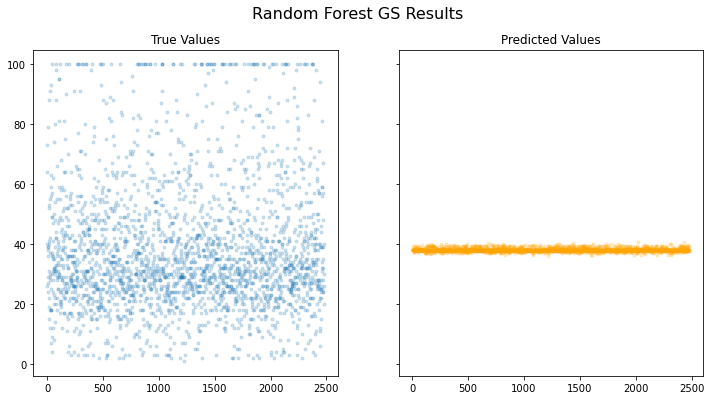

In [168]:
fit_score_plot(rf_gs.best_estimator_, 'Random Forest GS', X_train, X_test, y_train, y_test)

### AdaBoost Regressor

In [151]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=42)

RMSE Train: 20.7
RMSE Test: 21.38


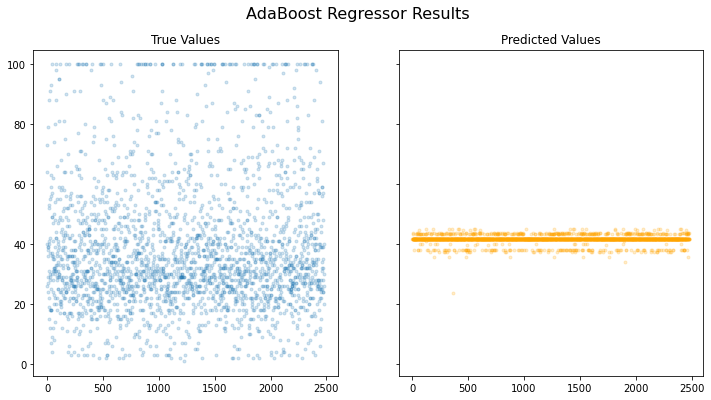

In [152]:
fit_score_plot(ada, 'AdaBoost Regressor', X_train, X_test, y_train, y_test)

In [24]:
target.values

array([63, 42, 28, ..., 20, 20, 30])

#### try sampling for uniform distribution

In [51]:
uniform_df = pd.DataFrame()

for i in target.value_counts().sort_index().index:
    
    temp = df[df['Pawpularity']==i]
    
    uniform_df = pd.concat([uniform_df, temp[:150]], axis=0)

In [52]:
uniform_df

,Id,Subject Focus,Eyes,Face,Near,Action,Accessory,Group,Collage,Human,Occlusion,Info,Blur,Pawpularity
2442,3ed899a8334a8e5c74f4a554f3ce6f08,0,1,1,1,0,0,0,0,0,0,0,0,1
3232,53b536999aecd800cfda720f3ca363cb,0,1,1,1,0,0,0,0,0,0,0,0,1
4235,6c159aede3df25fdbe781431aabcfc67,0,1,1,1,0,0,0,0,0,0,0,0,1
8674,e0a1efdaf4fbed8659b6d23994ee346e,0,1,1,1,0,0,0,0,1,1,0,0,1
11,00524dbf2637a80cbc80f70d3ff59616,0,1,1,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4944,7f18162c81ef0e4921efef44a3585c6c,0,0,1,1,0,0,0,0,0,0,0,0,100
5014,8135484044485a645bdb500c74cfb895,0,1,1,0,0,0,0,0,1,0,0,0,100
5018,81583933c4f5e42e014897d7ea433b79,0,1,1,1,0,0,0,0,1,1,0,0,100
5046,821b77dee521fcf9d5bfdf97e5d8a0b0,0,1,1,1,0,0,0,0,0,0,0,0,100


In [53]:
uniform_df['Pawpularity'].value_counts().sort_index()

1        4
2       77
3       90
4       36
5       34
      ... 
96      12
97       8
98      10
99       4
100    150
Name: Pawpularity, Length: 100, dtype: int64

<AxesSubplot:>

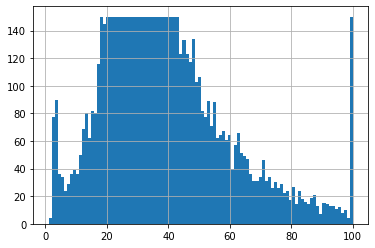

In [54]:
uniform_df['Pawpularity'].hist(bins=100)

In [55]:
uniform_df.value_counts().sum()

7553

In [56]:
uni_X = uniform_df.drop(['Id', 'Pawpularity'], axis=1)
uni_y = uniform_df['Pawpularity']

In [60]:
err = []

for i in range(200):
    
    for j in target.value_counts().sort_index().index:

        temp = df[df['Pawpularity']==j]

        uniform_df = pd.concat([uniform_df, temp[:i]], axis=0)   
    
   
    uni_X = uniform_df.drop(['Id', 'Pawpularity'], axis=1)
    uni_y = uniform_df['Pawpularity']
    
    rf = RandomForestRegressor(random_state=42)

    rf.fit(uni_X, uni_y)
    uni_preds = rf.predict(uni_X)

    rmse = mean_squared_error(uni_y, uni_preds)
    
    err.append(rmse)

KeyboardInterrupt: 

## Feature Engineering

## Data Preparation

## Modeling

- look at pytorch
- look at other image regressors

In [149]:
import autokeras as ak

In [150]:
reg = ak.ImageRegressor(overwrite=True, max_trials=3, tuner='greedy')

In [151]:
reg.fit(train_images, train_labels, epochs=2)


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
image_block_1/n...|False             |?                 
image_block_1/a...|False             |?                 
image_block_1/b...|resnet            |?                 
image_block_1/r...|True              |?                 
image_block_1/r...|resnet50_v2       |?                 
image_block_1/r...|True              |?                 
regression_head...|0                 |?                 
optimizer         |adam              |?                 
learning_rate     |0.001             |?                 

94674944/94668760 [==============================] - 8s 0us/step
Epoch 1/2
 62/248 [======>.......................] - ETA: 3:52 - loss: 299990.2188 - mean_squared_error: 299990.2188

KeyboardInterrupt: 

In [24]:
preds = reg.predict(train_images)

310/310 [==============================] - 38s 122ms/step


In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
err = mean_squared_error(train_labels, preds, squared=False)

In [27]:
err

20.598967811648038

### Random Forest

In [185]:
from sklearn.model_selection import train_test_split

X = df_poly
y = df['Pawpularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
rf = RandomForestRegressor(random_state=42)

rf.fit(X_train, y_train)
preds = rf.predict(X_test)

err = mean_squared_error(y_test, preds, squared=False)
err

21.31559345912616

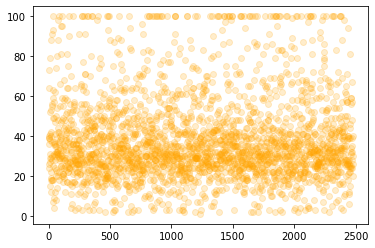

In [192]:
index = range(len(preds))
#plt.scatter(index, preds)
plt.scatter(index, y_test, color='orange', alpha=.2)

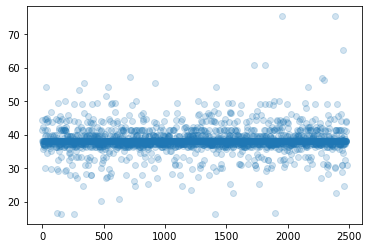

In [191]:
plt.scatter(index, preds, alpha=.2)

<AxesSubplot:>

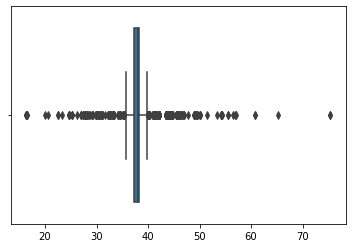

In [193]:
sns.boxplot(preds)

<AxesSubplot:xlabel='Pawpularity'>

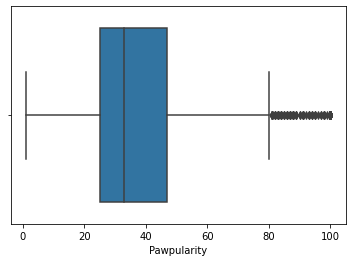

In [194]:
sns.boxplot(y_test)

## Conclusion

## Future Research

## Index

In [84]:
def quantile_clf(x):
    
    if x < q1:
        return 0
    elif ((q1 <= x) & (x < q3)):
        return 1
    elif ((q3 <= x) & (x < stop_high)):
        return 2
    elif stop_high < x:
        return 3

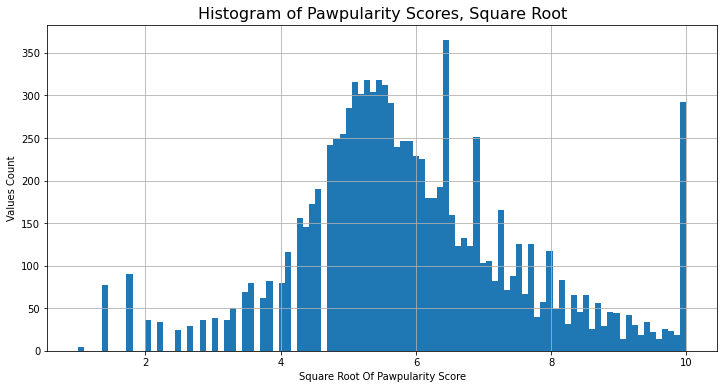

In [85]:
target_sqrt = np.sqrt(target)

plt.figure(figsize=(12,6))
target_sqrt.hist(bins=100);
plt.title('Histogram of Pawpularity Scores, Square Root', fontsize=16);
plt.xlabel('Square Root Of Pawpularity Score');
plt.ylabel('Values Count');
plt.show()

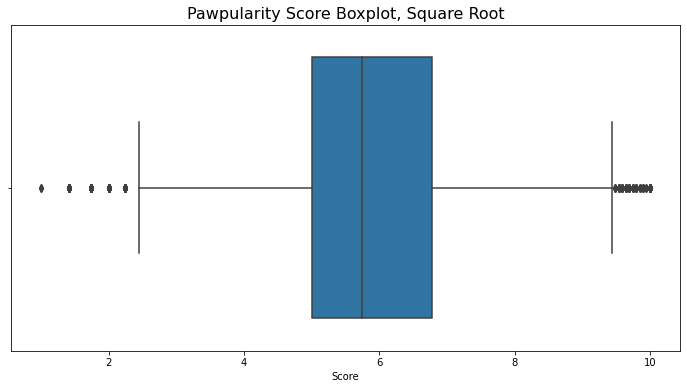

In [86]:
plt.figure(figsize=(12,6));
sns.boxplot(target_sqrt);
plt.title('Pawpularity Score Boxplot, Square Root', fontsize=16);
plt.xlabel('Score');